In [1]:
import pandas as pd

In [3]:
data = pd.read_csv('./fourclass_scale.csv', delimiter=" ", header=None)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862 entries, 0 to 861
Data columns (total 4 columns):
0    862 non-null int64
1    862 non-null object
2    855 non-null object
3    0 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 27.0+ KB


In [5]:
data.head()

,0,1,2,3
0,-1,1:0.747253,2:0.894737,NaN
1,1,1:0.692308,2:-0.824561,NaN
2,-1,1:0.472527,2:-0.0643275,NaN
3,-1,1:0.362637,2:0.789474,NaN
4,1,1:0.769231,2:-0.321637,NaN


In [6]:
data[3].value_counts()

Series([], Name: 3, dtype: int64)

In [7]:
data.rename(columns={0: 'Labels', 1: 'Feature_1',
                    2: 'Feature_2', 3: 'Noise'}, inplace= True)

In [8]:
data.columns

Index(['Labels', 'Feature_1', 'Feature_2', 'Noise'], dtype='object')

In [9]:
data = data.loc[pd.notnull(data['Feature_2']), :]

In [10]:
data.drop('Noise', axis=1, inplace=True)

In [11]:
data['Feature_1'] = data['Feature_1'].apply(lambda x: x[2:])
data['Feature_2'] = data['Feature_2'].apply(lambda x: x[2:])
data.head()

,Labels,Feature_1,Feature_2
0,-1,0.747253,0.894737
1,1,0.692308,-0.824561
2,-1,0.472527,-0.0643275
3,-1,0.362637,0.789474
4,1,0.769231,-0.321637


In [13]:
data['Feature_1'] = pd.to_numeric(data['Feature_1'])
data['Feature_2'] = pd.to_numeric(data['Feature_2'])
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 855 entries, 0 to 861
Data columns (total 3 columns):
Labels       855 non-null int64
Feature_1    855 non-null float64
Feature_2    855 non-null float64
dtypes: float64(2), int64(1)
memory usage: 26.7 KB


In [14]:
import numpy as np

In [15]:
X = data.as_matrix(columns=['Feature_1', 'Feature_2'])
Y = np.array(data['Labels'])

D:\Anacoda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [17]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")


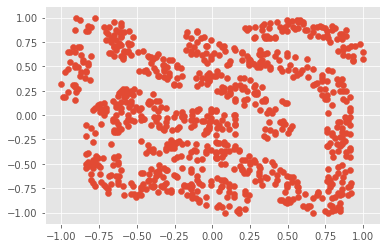

In [18]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [21]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [34]:
def visualization(titles, models):
    h = 0.2
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    for i, clf in enumerate(models):
        plt.subplot(2, 2, i + 1)
        plt.subplots_adjust(wspace=0.4, hspace=0.4)
        
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
        
        plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.coolwarm)
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.xticks(())
        plt.yticks(())
        plt.title(titles[i])
    plt.show()
            

In [26]:
C = 1.0

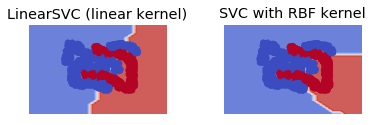

In [35]:
lin_svc = svm.LinearSVC(C=C).fit(X,Y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.5, C=C).fit(X,Y)

titles = ['LinearSVC (linear kernel)',
         'SVC with RBF kernel']
models = [lin_svc, rbf_svc]
visualization(titles, models)

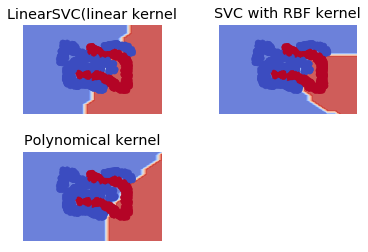

In [39]:
lin_svc = svm.LinearSVC(C=C).fit(X,Y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.5, C=C).fit(X,Y)
pol_svc = svm.SVC(kernel='poly', degree=3, gamma=0.5, C=C, coef0=0.0).fit(X,Y)
titles = ['LinearSVC(linear kernel', 'SVC with RBF kernel', 'Polynomical kernel']
models = [lin_svc, rbf_svc, pol_svc]
visualization(titles, models)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, train_size=0.8, random_state=2)

In [45]:
clf = svm.SVC(kernel='rbf', gamma=0.5, C=C).fit(X,Y)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print ("Accuracy score: %f" % accuracy_score(y_test, y_pred))

Accuracy score: 0.818713


In [51]:
from sklearn.metrics import average_precision_score
y_score = clf.decision_function(X_test)
average_precision = average_precision_score(y_test, y_score)
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))


Average precision-recall score: 0.84


In [53]:
clff = svm.SVC(kernel='rbf', gamma=2, C=1.0).fit(X,Y)
clff.fit(X_train, y_train)
y_pred = clff.predict(X_test)
print ("Accuracy score: %f" % accuracy_score(y_test, y_pred))
y_score = clff.decision_function(X_test)
average_precision = average_precision_score(y_test, y_score)
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Accuracy score: 0.988304
Average precision-recall score: 1.00
